In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,mean_absolute_error ,mean_squared_error
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
import joblib
import matplotlib.pyplot as plt

In [2]:
student_df = pd.read_csv("DataSets/student_scores.csv")
student_df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## Some Visualization

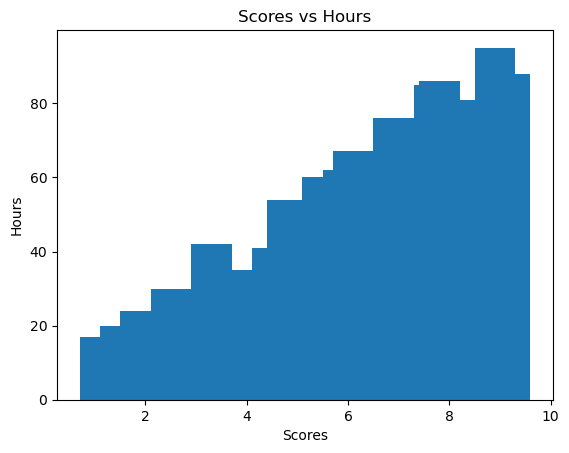

In [3]:
scores = student_df["Scores"]
hours = student_df["Hours"]

# Create the bar plot
plt.bar( hours,scores)

# Set labels and title
plt.xlabel('Scores')
plt.ylabel('Hours')
plt.title('Scores vs Hours')

# Display the plot
plt.show()

Text(0.5, 1.0, 'Hours vs Scores')

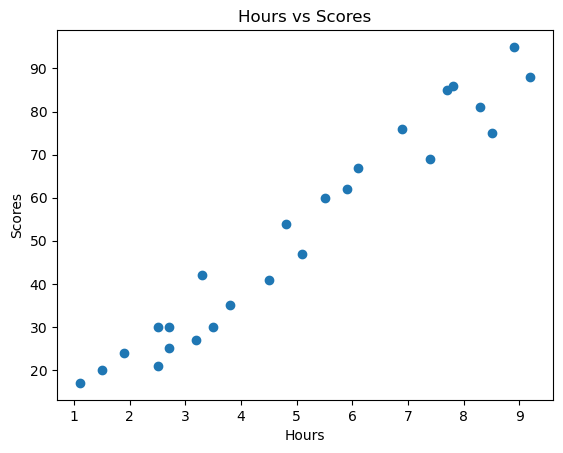

In [4]:
scores = student_df["Scores"]
hours = student_df["Hours"]

# Create the bar plot
plt.scatter(hours,scores);
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Hours vs Scores")

# Model Training 

In [5]:
x = np.array(student_df["Hours"]).reshape(-1,1)
y = student_df["Scores"]


In [6]:
# Splitting the Dara
x_train ,x_test ,y_train ,y_test = train_test_split(x,y,test_size=0.3, random_state=41)


In [7]:
model = LinearRegression()
model.fit(x_train ,y_train) 

LinearRegression()

In [8]:
model.score(x_test,y_test)

0.9621346134566173

In [9]:
joblib.dump(model,"TrainedModels/StudentScore.pkl")

['TrainedModels/StudentScore.pkl']

### Load the Model to make Prediction

In [10]:
mod = joblib.load("TrainedModels/StudentScore.pkl")

In [11]:
y_pred = mod.predict(x_test)

pd.DataFrame({"y_test": y_test,"y_pred":y_pred})

,y_test,y_pred
5,20,14.990287
19,69,74.884076
14,17,10.929691
10,85,77.929523
7,60,55.596245
8,81,84.020416
17,24,19.050883
11,62,59.656841


In [12]:
mse = mean_squared_error(y_test,y_pred)
print(f"mean squared error is {mse}")
mae = mean_absolute_error(y_test,y_pred)
print(f"mean absolute error is {mae}")

mean squared error is 25.63250010321114
mean absolute error is 4.843877805244228


# Task 2  Petrol Consumption

In [13]:
Petrol_df = pd.read_csv("DataSets/petrol_consumption.csv")
Petrol_df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


## Visualization

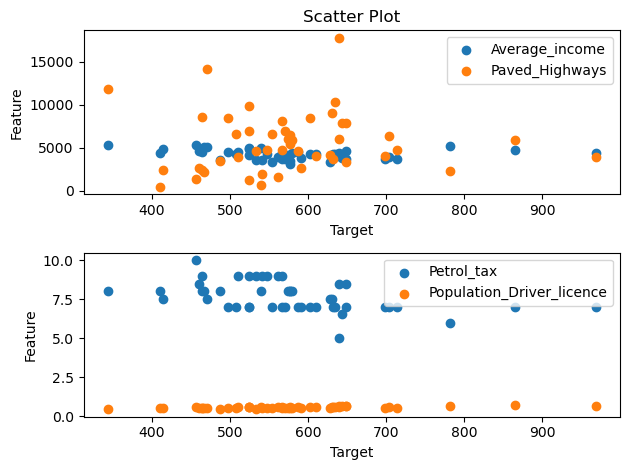

In [14]:
target = Petrol_df['Petrol_Consumption']
Average_income = Petrol_df['Average_income']
Paved_Highways = Petrol_df['Paved_Highways']
Petrol_tax = Petrol_df['Petrol_tax']
Population_Driver_licence = Petrol_df['Population_Driver_licence(%)']

plt.subplot(2, 1, 1)
plt.scatter(target, Average_income, label='Average_income')
plt.scatter(target, Paved_Highways, label='Paved_Highways')
plt.xlabel('Target')
plt.ylabel('Feature')
plt.title('Scatter Plot')
plt.legend()

plt.subplot(2, 1, 2)
plt.scatter(target, Petrol_tax, label='Petrol_tax')
plt.scatter(target, Population_Driver_licence, label='Population_Driver_licence')
plt.xlabel('Target')
plt.ylabel('Feature')
plt.legend()

plt.tight_layout()  # Adjusts the spacing between subplots
plt.show()


In [24]:
#Use Colums Transformer for MinMax Scalling
minmax =MinMaxScaler()


tranform_colums=["Petrol_tax","Average_income","Paved_Highways","Population_Driver_licence(%)"]

transformer =ColumnTransformer([("minmax",minmax,tranform_colums)])

data = transformer.fit_transform(Petrol_df)

data = pd.DataFrame(data,columns=["Petrol_tax","Average_income","Paved_Highways","Population_Driver_licence(%)"])
data.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%)
0,0.8,0.222905,0.089044,0.271062
1,0.8,0.451514,0.047202,0.443223
2,0.8,0.351909,0.066567,0.472527
3,0.5,0.792892,0.110656,0.285714
4,0.6,0.586222,0.000000,0.340659


In [16]:
x = data
y = Petrol_df["Petrol_Consumption"]


In [17]:
x_train ,x_test ,y_train ,y_test = train_test_split(x,y,test_size=0.3 ,random_state=52)


In [18]:
model1 = LinearRegression()
model1.fit(x_train ,y_train) 

LinearRegression()

In [19]:
model1.score(x_test,y_test)

0.7812556015921516

In [20]:
joblib.dump(model1,"TrainedModels/PetrolComsumption.pkl")

['TrainedModels/PetrolComsumption.pkl']

In [21]:
mod1 = joblib.load("TrainedModels/PetrolComsumption.pkl")

In [22]:
y_pred = mod1.predict(x_test)

pd.DataFrame({"y_test": y_test,"y_pred":y_pred})

,y_test,y_pred
8,464,498.887986
3,414,488.882860
25,566,549.211935
44,782,675.788092
18,865,745.446171
26,577,597.792995
6,344,337.080999
9,498,547.265145
34,487,520.150864
17,714,594.451750


In [23]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 3812.248209532195
Mean Absolute Error: 47.09566602370284
